In [29]:
# this is a program to find out the periodlength of an object orbiting another object in space 

#0.Import every important library 
#1.Write a function to read the data in a usable format, split data, strip, set first value as timepoint 0
#2.Get light intensity by substracting the error value (colum 3)
#3.Make a testplot
#4.Look for strange data in the time (can occure because of long signaling ways in space--> argsort?
#5.For long times without data (first find out how frequent data is measured) find a way to interrupt the plot (otherwise there is "wrong" data in case of a line plot)
#6.Make a testplot
#7.Getting spikes by substracting baseline from the signal data
#8.Subplots of all test data in one grafic
#9.Finding the period of the second star by measuring the time distance between two negative peaks 
#10.Plotting the peak data with the periodlength --> should be a lot of lines with one peak at the time of the periodlength


In [1]:
#0.import all packages that might be usefull(or not)
%matplotlib inline

import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import (cos, sin, tan,
                   arccos, arcsin, arctan, arctan2,
                   cosh, sinh, tanh,
                   exp, log, log10, sqrt,
                   nan, pi, array, arange, linspace, logspace)
from matplotlib.pyplot import plot, show
from matplotlib.gridspec import GridSpec
from scipy.signal import medfilt 
from scipy.signal import savgol_filter

In [2]:
#1. write a function to open an read an exel file with the star data
def loaddata(infile):
    a = open(infile, 'rt') # open in reading, text mode
    lines = a.readlines()# all lines as list, each item is one line
    a.close
    data = []
    for  i in range(1, len(lines)):  #exclude the header line
        line = lines[i].strip().split(',') #data should be split at the , remove possible spaces in the data
        data.append(line)  # collect stripped data in new list
    for a in range (len(data)):
        for b in range (7):
            if data[a][b] == '': # if there is an empty space in any colum an line 
                data[a][b] = 'nan' # write a nan in there to make the plotting easier
                b+=1    # run through all colums
        a+=1  # run through all lines
        
    data = np.array(data, dtype=float)# convert the list to an array, way easier to handle 
    for a in range (len(data)):
        data[a,0]=data[a,0]-131.5122939593566 # realised that the data starts at 131.51--> substraced that value from all data to start with first data at the beginning
        a += 1
    data[data==-999] = np.nan #missing data (-999) replaced with np.nan to ignore the data in a plot

    return data 


In [3]:
b = loaddata('Kepler-702.csv')

In [4]:
print(b)

[[0.00000000e+00 1.31512294e+02 9.99825100e-01 ... 0.00000000e+00
  6.67957699e+02 3.65626234e+02]
 [2.04346199e-02 1.31532729e+02 9.99952700e-01 ... 0.00000000e+00
  6.67958218e+02 3.65626582e+02]
 [4.08691397e-02 1.31553163e+02 1.00020610e+00 ... 0.00000000e+00
  6.67957250e+02 3.65626169e+02]
 ...
 [1.45944808e+03 1.59096038e+03 1.00017800e+00 ... 0.00000000e+00
  6.67941868e+02 3.65619102e+02]
 [1.45946852e+03 1.59098081e+03 1.00034130e+00 ... 0.00000000e+00
  6.67940887e+02 3.65620061e+02]
 [1.45948895e+03 1.59100125e+03 1.00040260e+00 ... 0.00000000e+00
  6.67942391e+02 3.65618634e+02]]


In [5]:
#2.substract value from column 2 by value from colum 3 (error value for ligt intensity)
signal = []
for i in range (len(b)):
    signal.append(b[i,2]-b[i,3])
print(signal[0:10]) # test for first values


[0.99944866442, 0.9995762798200001, 0.99982961096, 0.99962784536, 0.99961496156, 1.0001408598, 0.99962206145, 0.99985829306, 0.99994246756, 0.9994479266699999]


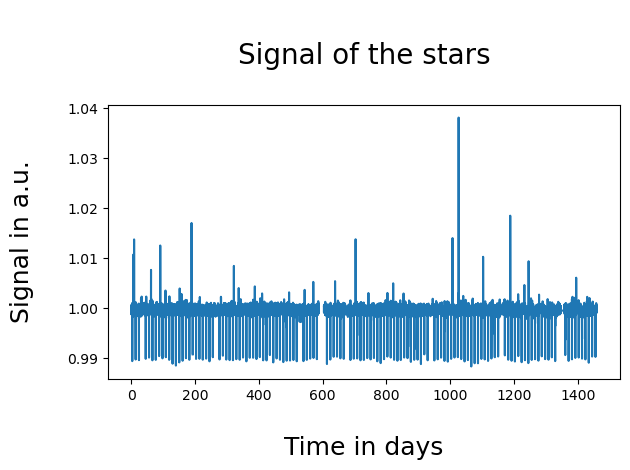

In [6]:
#3.first plot to look at the data: expect a bold baseline with peaks
date=b[:,0]
plot(date, signal) #first (0) colum is the time
plt.xlabel('\nTime in days', size=18)
plt.ylabel('Signal in a.u.\n', size=18) # au is astronomic units
plt.title('\nSignal of the stars\n', size = 20)
plt.tight_layout()
plt.savefig(fname='Thies_Jasmin_Control_plot_1.pdf')


[0.99944866 0.99957628 0.99982961 ... 0.99979694 0.99996256 1.00002445]
[0.00000000e+00 2.04346199e-02 4.08691397e-02 ... 1.45944808e+03
 1.45946852e+03 1.45948895e+03]


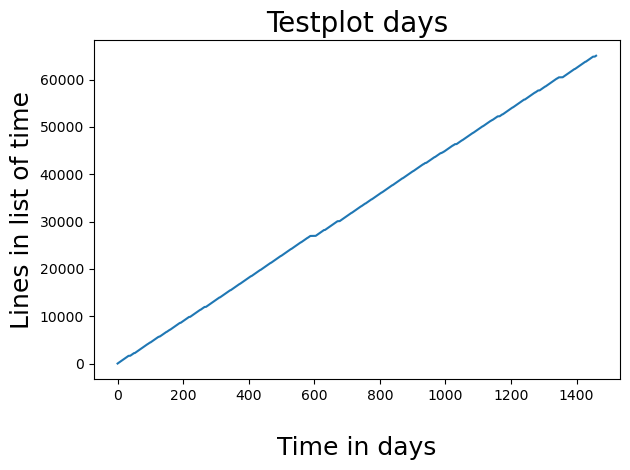

In [7]:
#4.signal is currently a list --> should also e an array (similar to the "data")
sig = np.array(signal)
print(sig) 
print(date)
plt.plot(date,np.arange(len(date))) # plot index and len of datearray to see shifts
plt.xlabel('\nTime in days', size=18)
plt.ylabel('Lines in list of time', size=18)
plt.title('Testplot days', size = 20)
plt.tight_layout()
plt.savefig(fname='Testplot days.pdf')
# apperantly there is some kind of shift in the date 

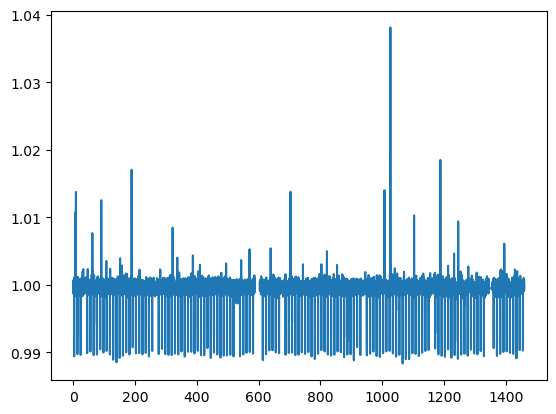

In [8]:
#argsort function to synchronize date and signal gives back an array of indices 
def sync_sort(date,signal):
    sort = np.argsort(date)
    #print(np.shape(sort))
    #print(sort)

    sorted_date = date[sort]
    sorted_signal= signal[sort] #sort the signal with the same index as the date 
    
    return sorted_date, sorted_signal
sorted_date, sorted_signal=sync_sort(b[:, 0], sig)    # use function to sort date  and signal
plot((sorted_date),(sorted_signal))

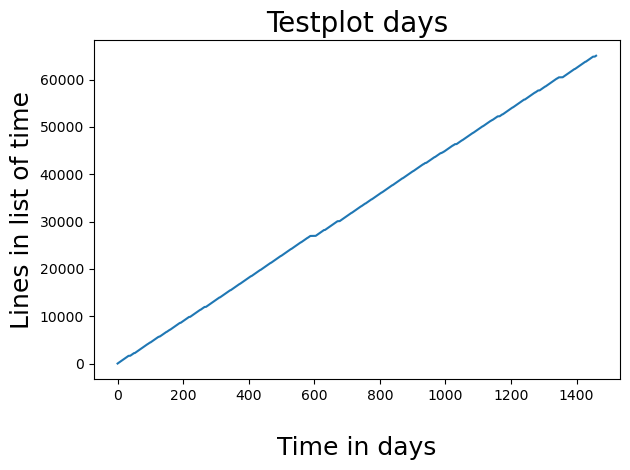

In [9]:
#test for a wrong sorting in the data 
for c in range (len(b)-1):
    if b[c+1, 0] < b[c, 0]:
        print('time is running backwarts')
    else:
        continue
# no output--> time data is sorted yet. stupid me i guess 

plt.plot(sorted_date,np.arange(len(sorted_date))) # plot index and len of datearray to see shifts
plt.xlabel('\nTime in days', size=18)
plt.ylabel('Lines in list of time', size=18)
plt.title('Testplot days_2', size = 20)
plt.tight_layout()
#another plot to see a change. No change, apperantly there has not been any shift but just a different amount of data on certain time periods

(0.0, 2.0)

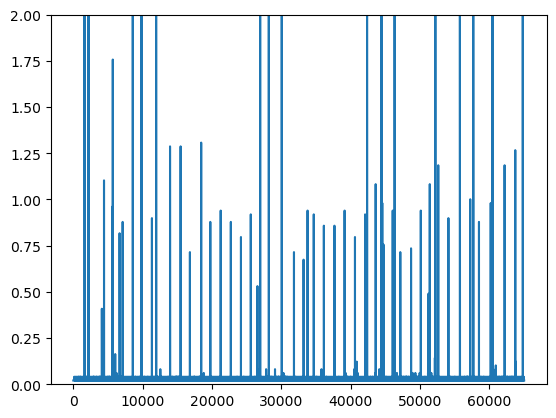

In [10]:
#5. find out the distance between the measured data (time) to define a certain difference where there should be an empty space in the line (for the plot) to see that there was a lack of data during that time. Otherwise the plot could be wrong if i decide to make a lineplot and not a dot plot 
tagesab = []
for i in range(len(sorted_date)-1):
    a=sorted_date[i+1]-sorted_date[i] #difference between two lines (date)
    tagesab.append(a)
#print(tagesab)
plot(tagesab)
plt.ylim([0,2])


In [11]:
#decided to put the limit to 0,25 
# better idea: take a percentage of the values given that are above value x and take that as a limit to make the program available for more datasets but i am running out of time and brainpower 
datenabstandgross = [] # make a list with the index of the value that is more than 0,25 days away from the next value 
for i in range (len(sorted_date)-1):
    if sorted_date[i+1]-sorted_date[i] >= 0.25:
        datenabstandgross.append(i+1)
    else:
        continue
print(len(datenabstandgross))
print(datenabstandgross)
# 58 values will replaced because of a lack of data around them 

58
[1626, 2196, 4122, 4435, 5598, 5701, 6679, 7123, 8583, 9841, 11345, 11953, 13957, 15482, 16823, 18449, 19763, 21263, 22725, 24185, 25601, 26561, 26954, 28201, 30067, 31831, 33215, 33792, 34685, 36141, 37667, 39132, 40628, 42087, 42372, 43612, 44447, 44566, 44743, 46070, 46343, 47163, 48715, 50122, 51230, 51415, 52220, 52638, 54103, 55759, 57251, 57688, 58511, 60205, 60457, 62206, 63745, 64828]


nan


(1600.0, 1650.0)

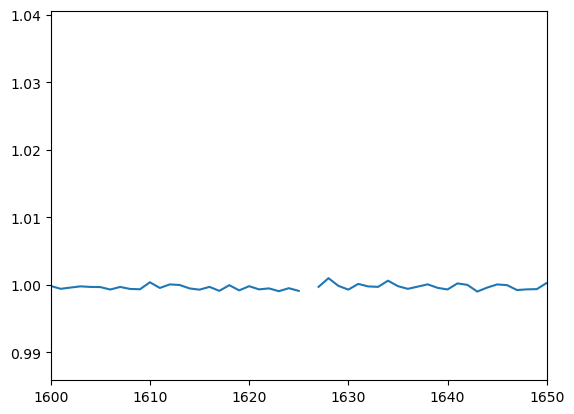

In [12]:
#set signal as nan 
for e in datenabstandgross:
    sorted_signal[e] = nan
plot(sorted_signal)
print(sorted_signal[2196])
plt.xlim([1600, 1650])

#Testplot:empty space --> replacing the value worked

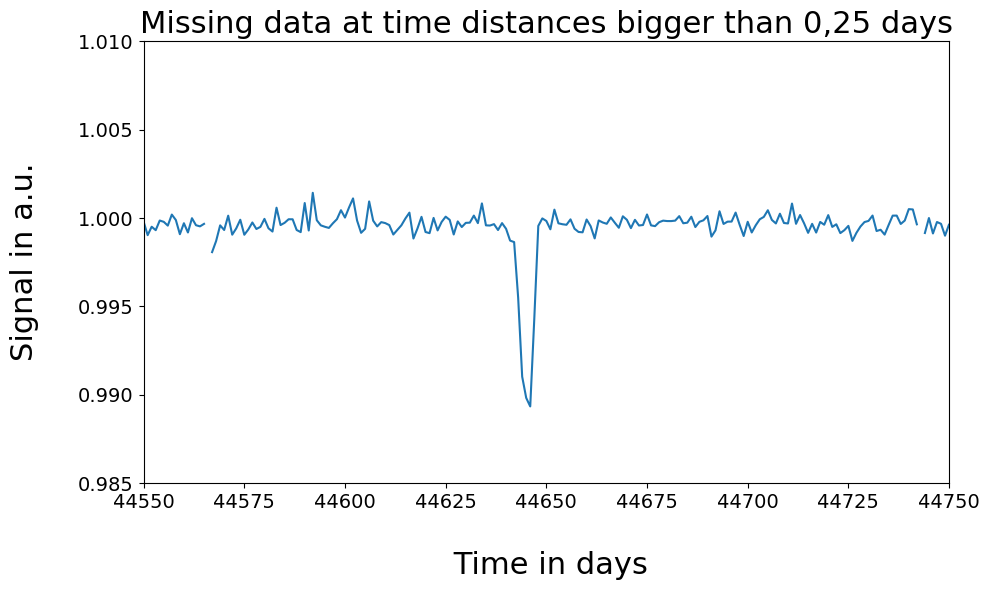

In [13]:
#6. Testplot with nan signals
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(sorted_signal)
plt.xlabel('\n Time in days', size=22)
plt.ylabel('Signal in a.u.\n', size=22)
plt.title('Missing data at time distances bigger than 0,25 days', size = 22)

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.xlim([44550, 44750])
plt.ylim([0.985, 1.01])
plt.tight_layout()
plt.savefig(fname='Testplot_6.pdf')
plt.show()

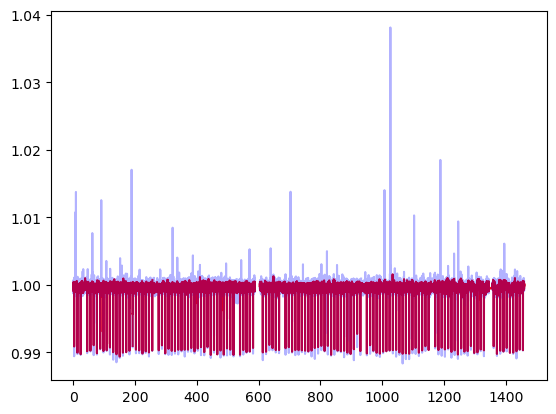

In [14]:
# 7. Getting spikes by substracting baseline from the signal data
signal_ohne_baseline_a = medfilt(sorted_signal, kernel_size=3)
plot(sorted_date, signal_ohne_baseline_a, color = 'red')
plot(sorted_date, sorted_signal, alpha= 0.3, color = 'blue')

# groessere Zahl für kernel size schneidet mehr Daten an der unteren Seite ab 

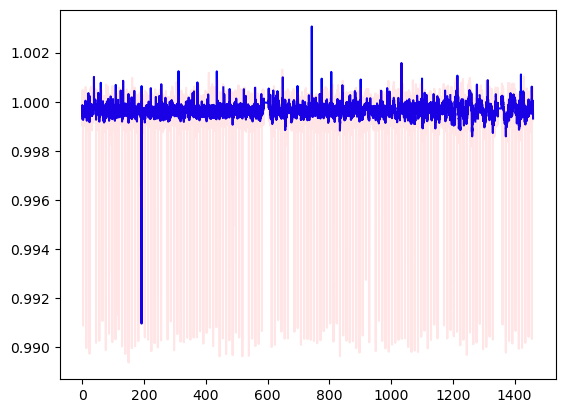

In [15]:
#basis line for longlasting flux changes 
basislinie_b =medfilt(sorted_signal, kernel_size=21) 
plot(sorted_date, basislinie_b , color = 'blue')
plot(sorted_date, signal_ohne_baseline_a, color = 'red', alpha = 0.1)
show()

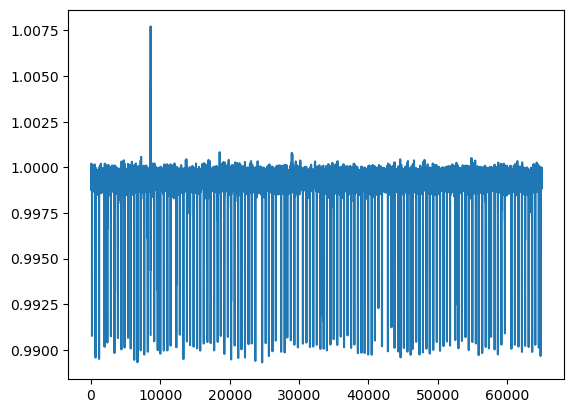

In [16]:
# substracting basis line from signal to get just the fluctuation
basis= np.array(basislinie_b)
signal_4c = np.array(signal_ohne_baseline_a)
helligkeitseinbrueche= signal_4c-basis + basis[0]# add the first basis value, otherwise signal would not be at the right intensity anymore
plot(helligkeitseinbrueche)
show()

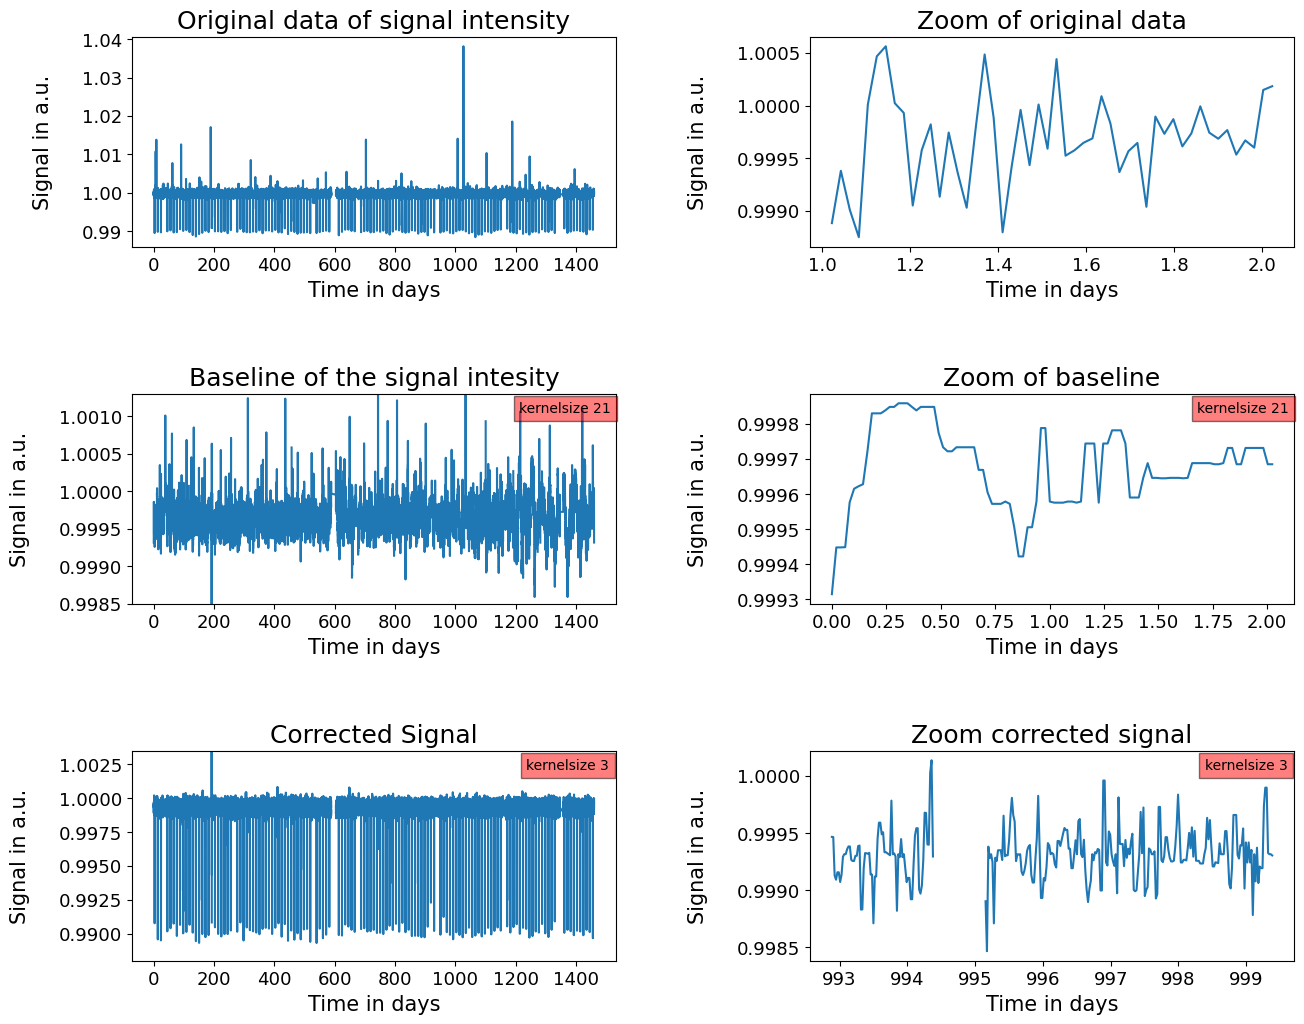

In [17]:
#8.Subplots of all test data in one grafic 


gs = GridSpec(3, 2, figure = fig, wspace= 0.4, hspace= 0.7)
fig = plt.figure(figsize= (15,12))

ax1 = fig.add_subplot(gs[0, 0])
plt.xlabel('Time in days', size = 15)
plt.ylabel('Signal in a.u.\n', size = 15)
plt.title('Original data of signal intensity', size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)


ax2 = fig.add_subplot(gs[0, 1])
plt.xlabel('Time in days', size = 15)
plt.ylabel('Signal in a.u.\n', size = 15)
plt.title('Zoom of original data', size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)

ax3 = fig.add_subplot(gs[1, 0])
plt.xlabel('Time in days', size = 15)
plt.ylabel('Signal in a.u.\n', size = 15)
plt.title('Baseline of the signal intesity', size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.text(0.8, 0.91,  'kernelsize 21', bbox=dict(facecolor='red', alpha=0.5), transform = ax3.transAxes)
plt.ylim(0.9985, 1.0013)

ax4 = fig.add_subplot(gs[1, 1])
plt.xlabel('Time in days', size = 15)
plt.ylabel('Signal in a.u.\n', size = 15)
plt.title('Zoom of baseline', size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.text(0.8, 0.91,  'kernelsize 21', bbox=dict(facecolor='red', alpha=0.5), transform = ax4.transAxes)

ax5 = fig.add_subplot(gs[2, 0])
plt.xlabel('Time in days', size = 15)
plt.ylabel('Signal in a.u.\n', size = 15)
plt.title('Corrected Signal', size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.text(0.815, 0.91,  'kernelsize 3', bbox=dict(facecolor='red', alpha=0.5), transform = ax5.transAxes)
plt.ylim(0.988, 1.0035)

ax6 = fig.add_subplot(gs[2, 1])
plt.xlabel('Time in days', size = 15)
plt.ylabel('Signal in a.u.\n', size = 15)
plt.title('Zoom corrected signal', size = 18)
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.text(0.815, 0.91,  'kernelsize 3', bbox=dict(facecolor='red', alpha=0.5), transform = ax6.transAxes)

#was plotet
ax1.plot(b[:,0], signal)
ax2.plot(b[50:100, 0], signal[50:100])
ax3.plot(sorted_date, basislinie_b)
ax4.plot(sorted_date[0:100], basislinie_b[0:100])
ax5.plot(sorted_date,helligkeitseinbrueche)
ax6.plot(sorted_date[44670: 44950],helligkeitseinbrueche[44670: 44950])
plt.tight_layout
plt.savefig(fname='Plot_8 .pdf')
show()

(1940.0, 4850.0)

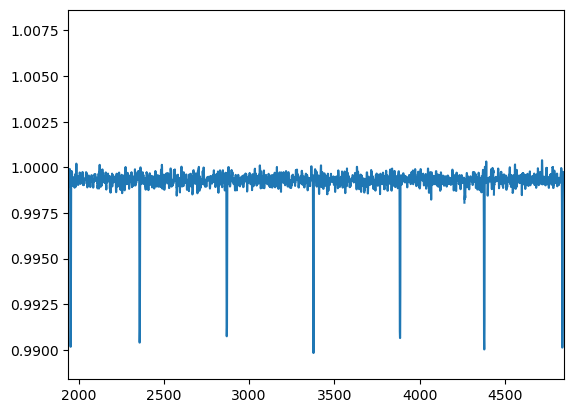

In [18]:
#9. Finding the period of the second star by measuring the time distance between two negative peaks 
plot(helligkeitseinbrueche)
plt.xlim(1940, 4850)

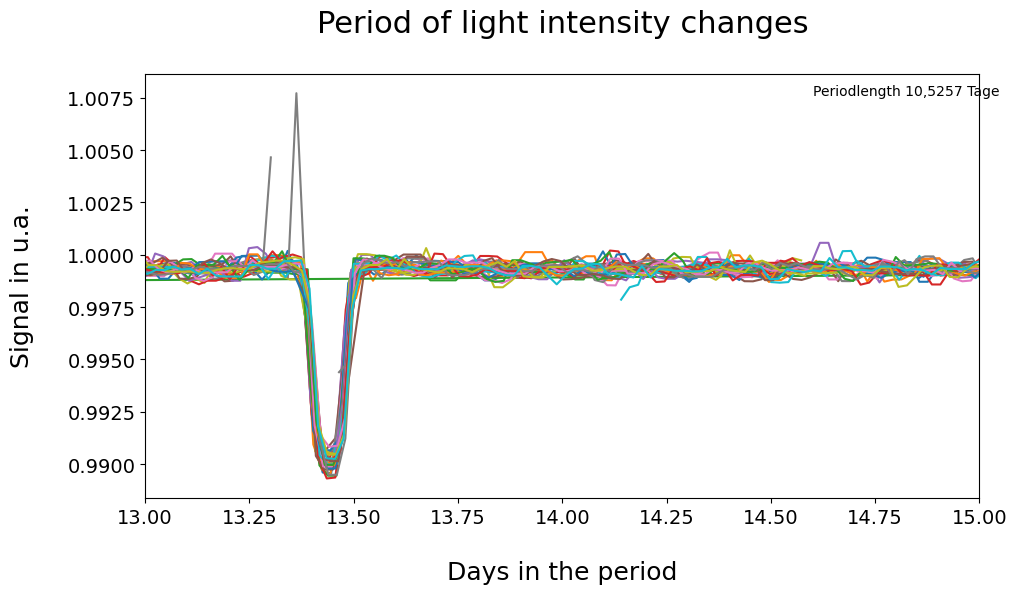

In [19]:
# 10 Plotting the peak data with the periodlength --> sould be a lot of lines with one peak at the time of the periodlength 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
period = 10.5257
for n in range(30):

    plt.plot(sorted_date-n*period, helligkeitseinbrueche)
    
plt.xlim(13, 15)
plt.title('Period of light intensity changes\n', size = 22 )
plt.xlabel('\nDays in the period', size=18)
plt.ylabel('Signal in u.a.\n', size=18)
plt.tight_layout()
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.text(0.8, 0.95 , 'Periodlength 10,5257 Tage', transform = ax.transAxes)
plt.savefig(fname='Plot_10.pdf')
plt.show()
#Periode ist 10, 5 Tage found that out by testing different values